In [55]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [57]:
invoices_df = pd.read_csv('/Users/ivanjamesleebastilo/Desktop/fct_invoice.csv')

In [58]:
with open('/Users/ivanjamesleebastilo/Desktop/dim_customer.json') as json_file:
    customer_data = json.load(json_file)
customer_df = pd.DataFrame(customer_data)

EASY

1. How many unique customers are in the dataset?

In [59]:
unique_customers = invoices_df['customer_id'].nunique()
unique_customers

5191

2. What are the different categories of products available? How many unique categories are there?

In [60]:
categories = invoices_df['category'].unique()
categories_list = ', '.join(categories)
categories_list

'Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir'

In [61]:
unique_categories = invoices_df['category'].nunique()
unique_categories

8

3. Which payment method is the most popular? How many times was it used?

In [62]:
popular_payment = invoices_df['payment_method'].value_counts().idxmax()
usage = invoices_df['payment_method'].value_counts().max()
popular_payment, usage

('Cash', 44447)

MEDIUM

1. What are the three most popular categories, by total sales?

In [63]:
invoices_df['total_sales'] = invoices_df['quantity'] * invoices_df['price']
category_sales = invoices_df.groupby('category')['total_sales'].sum()
popular_categories = category_sales.nlargest(3)
popular_categories = popular_categories.reset_index()
popular_categories_items = popular_categories.to_dict('split')['data']
popular_categories_items

[['Clothing', 113996791.03999999],
 ['Shoes', 66553451.47],
 ['Technology', 57862350.0]]

2. What are the total sales attributed to customers over the age of 45?

In [64]:
customersover_45 = customer_df[customer_df['age'] > 45]
customeridsover_45 = customersover_45['id']
invoicesover_45 = invoices_df[invoices_df['customer_id'].isin(customeridsover_45)]
totalsalesover_45 = (invoicesover_45['price'] * invoicesover_45['quantity']).sum()
totalsalesover_45

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

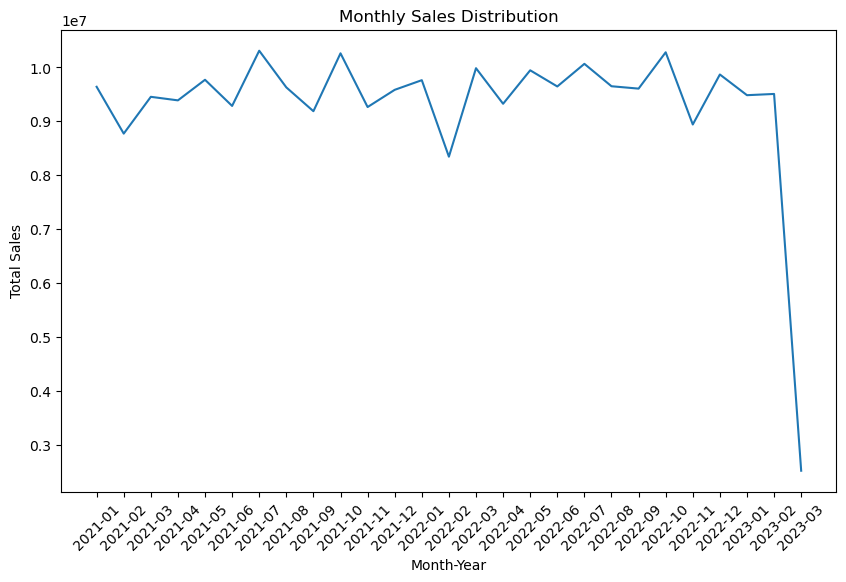

In [65]:
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], format='%d/%m/%Y')
invoices_df['month_year'] = invoices_df['invoice_date'].dt.to_period('M')
monthly_sales = invoices_df.groupby('month_year')['total_sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.show()

Hard

Question 1: Create a pivot table showing the breakdown of sales across dimensions - category and decade age range.

In [66]:
customer_df['decade_age_range'] = pd.cut(customer_df['age'], bins=np.arange(0, 100, 10), right=False)
merged_df = pd.merge(invoices_df, customer_df, left_on='customer_id', right_on='id')
pivot_table = pd.pivot_table(merged_df, values='total_sales', index='category', columns='decade_age_range', aggfunc=np.sum)
pivot_table

decade_age_range,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)"
category,,,,,,,,,
Books,0.0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,0.0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,0.0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,0.0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,0.0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,0.0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,0.0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,0.0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
